## About Dataset   
Context  
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
Inspiration
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Tasks to Solve :
To predict which customer is more likely to purchase the newly introduced travel package
Which variables are most significant.
Which segment of customers should be targeted more.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("susant4learning/holiday-package-purchase-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tejes\.cache\kagglehub\datasets\susant4learning\holiday-package-purchase-prediction\versions\1


In [4]:
df=pd.read_csv(r"C:\Users\tejes\Desktop\Datasets\Travel.csv")

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['Gender'].replace('Fe male','Female')

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
4883      Male
4884      Male
4885    Female
4886      Male
4887      Male
Name: Gender, Length: 4888, dtype: object

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].replace('Single','Unmarried')

0       Unmarried
1        Divorced
2       Unmarried
3        Divorced
4        Divorced
          ...    
4883    Unmarried
4884    Unmarried
4885      Married
4886    Unmarried
4887    Unmarried
Name: MaritalStatus, Length: 4888, dtype: object

In [11]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [12]:
#checking missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'%missing values')
    

Age 4.62357 %missing values
TypeofContact 0.51146 %missing values
DurationOfPitch 5.13502 %missing values
NumberOfFollowups 0.92062 %missing values
PreferredPropertyStar 0.53191 %missing values
NumberOfTrips 2.86416 %missing values
NumberOfChildrenVisiting 1.35025 %missing values
MonthlyIncome 4.76678 %missing values


## Imputing Missing Values

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.mode()[0],inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [15]:
#df.drop('CustomerID',inplace=True,axis=1)

In [16]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering

### Feature Extraction

In [18]:
df['TotalVisitings']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [19]:
#get all the numerical features
num_features=[features for features in df.columns if df[features].dtype != 'O']
print('number of features ',len(num_features))
print(num_features)

number of features  13
['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisitings']


In [20]:
#get all the categorical features
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print("number of categorical features",len(cat_features))
print(cat_features)

number of categorical features 6
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [21]:
# get the coontinous Features
con_features=[feature for feature in num_features if len(df[feature].unique()) >=25]
print("the discreate features are",len(con_features))
print(con_features)

the discreate features are 4
['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']


In [26]:
# get the discrete features
dis_features = []  # Initialize empty list first
dis_features = [feature for feature in num_features if feature not in con_features]
print(len(dis_features))
print(dis_features)

9
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisitings']


In [27]:
from sklearn.model_selection import train_test_split
x=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
x.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitings
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [29]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [31]:
#create column transformer with 3 types of transformers
cat_features= x.select_dtypes(include="object").columns
num_features= x.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
 [ ("OneHotEncoder",oh_transformer,cat_features),
       ("StandardScaler",numeric_transformer,num_features)])

In [32]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['CustomerID', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisitings'],
      dtype='object'))])

In [33]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

## Model Training

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix,roc_auc_score

In [37]:
models={ "RandomForest":RandomForestClassifier() ,
         "DecisionTreeClassifier":DecisionTreeClassifier(),
         "Adaboost":AdaBoostClassifier(),
         "Gradientboost":GradientBoostingClassifier() }

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)  #train model

    #make predictions
    y_train_pred= model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training the performance
    train_accuracy_score=accuracy_score(y_train,y_train_pred)
    train_f1_score=f1_score(y_train,y_train_pred,average='weighted')
    train_precision_score=precision_score(y_train,y_train_pred)
    train_recall_score=recall_score(y_train,y_train_pred)
    train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    #testing the performance
    test_accuracy_score=accuracy_score(y_test,y_test_pred)
    test_f1_score=f1_score(y_test,y_test_pred,average='weighted')
    test_precision_score=precision_score(y_test,y_test_pred)
    test_recall_score=recall_score(y_test,y_test_pred)
    test_rocauc_score=roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])


    print('Model Performance For Training Dataset')
    print('Accuracy',train_accuracy_score)
    print('F1 Score',train_f1_score)
    print('precision',train_precision_score)
    print('Recall',train_recall_score)
    print('Roc_Auc_Score',train_rocauc_score)


    print('--------------------------------------------------------------------------------------------')


    print('Model Performance For Testing Dataset')
    print('Accuracy',test_accuracy_score)
    print('F1 Score',test_f1_score)
    print('Precision',test_precision_score)
    print('Recall',test_recall_score)
    print('Roc_Auc_Score',test_rocauc_score)

    print('=============================================================================================')

RandomForest
Model Performance For Training Dataset
Accuracy 1.0
F1 Score 1.0
precision 1.0
Recall 1.0
Roc_Auc_Score 1.0
--------------------------------------------------------------------------------------------
Model Performance For Testing Dataset
Accuracy 0.9079754601226994
F1 Score 0.8986669291252474
Precision 0.9391304347826087
Recall 0.5654450261780105
Roc_Auc_Score 0.7782752449822707
DecisionTreeClassifier
Model Performance For Training Dataset
Accuracy 1.0
F1 Score 1.0
precision 1.0
Recall 1.0
Roc_Auc_Score 1.0
--------------------------------------------------------------------------------------------
Model Performance For Testing Dataset
Accuracy 0.8865030674846626
F1 Score 0.8842096113405442
Precision 0.7325581395348837
Recall 0.6596858638743456
Roc_Auc_Score 0.800618027235775
Adaboost
Model Performance For Training Dataset
Accuracy 0.8713554987212276
F1 Score 0.8537797055184998
precision 0.8054054054054054
Recall 0.40877914951989025
Roc_Auc_Score 0.6930723789095837
------

## Hyperparameter Tuning

In [87]:
#hyper parameter tuning
rf_param= { 'max_depth':[5,8,15,None,18],
            'max_features':[5,7,"auto",8],
            'min_samples_split':[2,8,15,20],
            'n_estimators':[100,200,500,1000]  }

#models for hyperparameter tuning

randomcv_models=[
                  ('RF',RandomForestClassifier(),rf_param),

                                                            ]


In [88]:
from sklearn.model_selection import RandomizedSearchCV

model_param =  {}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(  estimator=model,param_distributions=rf_param,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[model]=random.best_params_

for model_name in model_param:
    print(f"-------------Best Parameters fOR {model_name}--------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------Best Parameters fOR RandomForestClassifier()--------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [91]:
models={ "RandomForest":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features= 7,max_depth= 15) }

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)  #train model

    #make predictions
    y_train_pred= model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training the performance
    train_accuracy_score=accuracy_score(y_train,y_train_pred)
    train_f1_score=f1_score(y_train,y_train_pred,average='weighted')
    train_precision_score=precision_score(y_train,y_train_pred)
    train_recall_score=recall_score(y_train,y_train_pred)
    train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    #testing the performance
    test_accuracy_score=accuracy_score(y_test,y_test_pred)
    test_f1_score=f1_score(y_test,y_test_pred,average='weighted')
    test_precision_score=precision_score(y_test,y_test_pred)
    test_recall_score=recall_score(y_test,y_test_pred)
    test_rocauc_score=roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])


    print('Model Performance For Training Dataset')
    print('Accuracy',train_accuracy_score)
    print('F1 Score',train_f1_score)
    print('precision',train_precision_score)
    print('Recall',train_recall_score)
    print('Roc_Auc_Score',train_rocauc_score)


    print('--------------------------------------------------------------------------------------------')


    print('Model Performance For Testing Dataset')
    print('Accuracy',test_accuracy_score)
    print('F1 Score',test_f1_score)
    print('Precision',test_precision_score)
    print('Recall',test_recall_score)
    print('Roc_Auc_Score',test_rocauc_score)

    print('-------------------------------------------------------------------------------------------')

RandomForest
Model Performance For Training Dataset
Accuracy 0.9989769820971867
F1 Score 0.9989758963204138
precision 1.0
Recall 0.9945130315500685
Roc_Auc_Score 0.9972565157750343
--------------------------------------------------------------------------------------------
Model Performance For Testing Dataset
Accuracy 0.9222903885480572
F1 Score 0.916234762576187
Precision 0.9457364341085271
Recall 0.6387434554973822
Roc_Auc_Score 0.8149244596419566
-------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

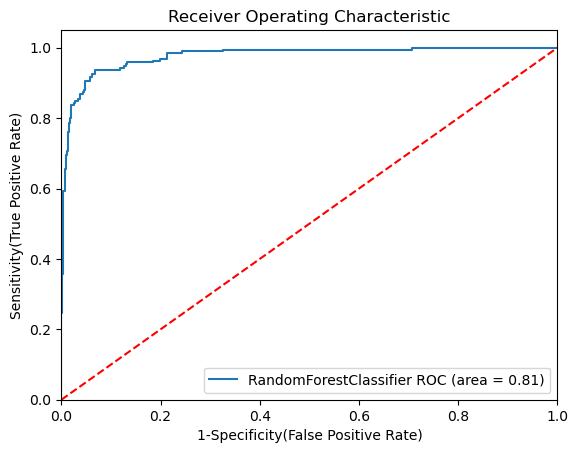

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure()

## add the models to the list that you want to view on roc curve
auc_models=[{
    'label':'RandomForestClassifier',
    'model':RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features= 7,max_depth= 15),
    'auc':0.8149244596419566
},]

#create loop through all model
for algo in auc_models:
    
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
 # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
 # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
 # Custom settings for the plot
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()


## Random Forest Regression

#### Car Price Prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\tejes\Desktop\Datasets\CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
data.shape

(4340, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
data['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [8]:
#numerical features
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']

#categorical features 
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

#discrete features
dis_features = [feature for feature in num_features if len(data[feature].unique()) <= 25]

#continuous features
con_features = [feature for feature in num_features if feature not in dis_features]

In [9]:
print("number of numerical features",len(num_features))
print(num_features)
print('/n')
print("number of categorical features",len(cat_features))
print(cat_features)
print('/n')
print("number of discreate features",len(dis_features))
print(dis_features)
print('/n')
print("number of coontinous  features",len(con_features))
print(con_features)
print('/n')

number of numerical features 3
['year', 'selling_price', 'km_driven']
/n
number of categorical features 5
['name', 'fuel', 'seller_type', 'transmission', 'owner']
/n
number of discreate features 0
[]
/n
number of coontinous  features 3
['year', 'selling_price', 'km_driven']
/n


In [10]:
from sklearn.model_selection import train_test_split

x=data.drop(['selling_price'],axis=1)
y=data['selling_price']


x_train,x_test,y_trsin,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
x.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [30]:
len(data['name'].unique())

1491

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

x['name']=le.fit_transform(x['name'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [32]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [15]:
len(data['fuel'].unique()),len(data['seller_type'].unique()),len(data['transmission'].unique()),len(data['owner'].unique())

(5, 3, 2, 5)

In [16]:
data['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [25]:
#create column transformer with 3 types of transformers
num_features = x.select_dtypes(exclude='object').columns
label_feature = data['name']
ohe_features = ['fuel', 'seller_type', 'transmission','owner']

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', oh_transformer, ohe_features)
    ],remainder='passthrough'#by this only features which has to be will be transformed and remaining columns are undisturbed
)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [19]:
x=preprocessor.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(3472, 11)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [23]:
#createing a function to evaluate models
def evaluate_model(truth,predicted):
    mse=mean_squared_error(truth,predicted)
    mae=mean_absolute_error(truth,predicted)
    rmse=np.sqrt(mse)
    score=r2_score(truth,predicted)
    return mae,rmse,score

In [24]:
models={ 'randomforestregressor':RandomForestRegressor(),
          'DecisionTreeRegressor':DecisionTreeRegressor(),
         'KneighboursRegressor':KNeighborsRegressor(),
         'LinearRegression':LinearRegression(),
         'ridge':Ridge(),
         'Lasso':Lasso()
       }

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)  #train model

    #make predictions
    y_train_pred= model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training the performance
    train_mae,train_rmse,train_r2score=evaluate_model(y_train,y_train_pred)
    
    #testing the performance
    test_mae,test_rmse,test_r2score=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    
    print('Model Performance For Testing Dataset')
    print('MAE',train_mae)
    print('RMSE',train_rmse)
    print('R2 SCORE',train_r2score)


    print('--------------------------------------------------------------------------------------------')


    print('Model Performance For Testing Dataset')
    print('MAE',test_mae)
    print('RMSE',test_rmse)
    print('R2 SCORE',test_r2score)
    
    print('============================================================================================')

ValueError: could not convert string to float: 'First Owner'

## Hyper Parameter Tuning

In [ ]:
#hyper parameter tuning
knn_param={'n_neighbors':[2,3,10,20,40,50]}
rf_param= { 'max_depth':[5,8,15,None,18],
            'max_features':[5,7,"auto",8],
            'min_samples_split':[2,8,15,20],
            'n_estimators':[100,200,500,1000]  }

#models for hyperparameter tuning

randomcv_models=[
                  ('RF',RandomForestClassifier(),rf_param),
                  ('KNN',KNeighborsRegressor(),knn_param)
                                                            ]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_param =  {}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(  estimator=model,param_distributions=rf_param,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[model]=random.best_params_

for model_name in model_param:
    print(f"-------------Best Parameters fOR {model_name}--------------")
    print(model_param[model_name])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

# Define the parameter grids for each model
knn_param = {'n_neighbors': [2, 3, 10, 20, 40, 50]}
rf_param = {
    'max_depth': [5, 8, 15, None, 18],
    'max_features': [5, 7, "auto", 8],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500, 1000]
}

# Models for hyperparameter tuning
randomcv_models = [
    ('RF', RandomForestRegressor(), rf_param),
    ('KNN', KNeighborsRegressor(), knn_param)
]

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------Best Parameters FOR {model_name}--------------")
    print(model_param[model_name])